In [1]:
%matplotlib inline
#Imports required to run

from matplotlib.pylab import *
import matplotlib.pylab as plt
import numpy as np

#Imports from ICgen-Binary directory
import os
sys.path.append('/astro/users/dflemin3/Desktop/ICgen')
sys.path.append('/astro/users/dflemin3/Desktop')
import isaac
import AddBinary
import binaryUtils

#Typical plot parameters that make for pretty plots
plt.rcParams['figure.figsize'] = (10,8)
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=20, usetex=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 20.0

/astro/users/dflemin3/Desktop/ICgen/isaac.pyc


In [14]:
#Times
rand_control_time = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

rand_lowEcc_time = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

#Plot Binary/Disk CoM vs Time

In [22]:
rand_control_binComX = [  7.98482687e-10,   6.08413040e-06,   6.44823766e-06,
         3.48632492e-06,  -4.07099678e-06,  -2.39413452e-05,
        -4.07852361e-05,  -4.26573596e-05,  -5.10798638e-05,
        -6.90100278e-05,  -8.96923683e-05,  -1.03683331e-04,
        -1.10559124e-04,  -1.25216583e-04,  -1.34320194e-04,
        -1.51630104e-04,  -1.68642687e-04,  -1.83036224e-04,
        -1.93562258e-04,  -2.09109809e-04,  -2.16999608e-04,
        -2.27420267e-04,  -2.39645693e-04,  -2.48553248e-04,
        -2.53146488e-04,  -2.63093039e-04,  -2.75753773e-04,
        -2.96375343e-04,  -3.10600326e-04,  -3.28475243e-04,
        -3.43971220e-04,  -3.69930201e-04,  -3.87348638e-04,
        -3.97646128e-04,  -4.15803724e-04,  -4.35286149e-04,
        -4.55398088e-04,  -4.82223458e-04,  -5.09973426e-04,
        -5.39689301e-04,  -5.61548571e-04,  -5.83045169e-04,
        -5.98301763e-04,  -6.09985672e-04,  -6.26775866e-04,
        -6.52644478e-04,  -6.68533603e-04,  -6.85021388e-04,
        -6.94236057e-04,  -7.16380819e-04,  -7.36380698e-04,
        -7.69355876e-04,  -8.00214034e-04,  -8.29496436e-04,
        -8.57834901e-04,  -8.76901016e-04,  -8.94612374e-04,
        -9.15231243e-04,  -9.31239243e-04,  -9.49211177e-04,
        -9.69775395e-04,  -9.90738022e-04,  -1.01445082e-03,
        -1.04095980e-03,  -1.07258208e-03,  -1.10065042e-03,
        -1.12565946e-03,  -1.14783836e-03,  -1.16536433e-03,
        -1.19134334e-03,  -1.21104850e-03,  -1.22424938e-03,
        -1.24296267e-03,  -1.26797557e-03,  -1.30328602e-03,
        -1.34060485e-03,  -1.37651866e-03,  -1.40642081e-03,
        -1.43719687e-03,  -1.47045251e-03,  -1.50375298e-03,
        -1.53492985e-03,  -1.56639449e-03,  -1.59453557e-03,
        -1.61426517e-03,  -1.64188966e-03,  -1.67394310e-03,
        -1.70775117e-03,  -1.74420760e-03,  -1.77959094e-03,
        -1.81568874e-03,  -1.84588392e-03,  -1.87860958e-03,
        -1.91177936e-03,  -1.94611445e-03,  -1.98564890e-03,
        -2.02017130e-03,  -2.04712719e-03,  -2.08578347e-03,
        -2.11812500e-03,  -2.15063013e-03,  -2.18696979e-03,
        -2.22543205e-03,  -2.26879708e-03,  -2.30954334e-03,
        -2.33781070e-03,  -2.37641899e-03,  -2.40352804e-03,
        -2.44083490e-03,  -2.47859637e-03,  -2.52693898e-03,
        -2.57241986e-03,  -2.61517352e-03,  -2.65581162e-03,
        -2.70286355e-03,  -2.74972084e-03,  -2.78872301e-03,
        -2.82716666e-03,  -2.86724205e-03,  -2.90626417e-03,
        -2.94883496e-03,  -2.98581082e-03,  -3.02876092e-03,
        -3.07643501e-03,  -3.11970680e-03,  -3.15016571e-03,
        -3.19245252e-03,  -3.23138385e-03,  -3.27034450e-03,
        -3.30120154e-03,  -3.33633925e-03,  -3.37750063e-03,
        -3.42648105e-03,  -3.46204557e-03,  -3.50597836e-03,
        -3.55103720e-03,  -3.59822175e-03,  -3.64614045e-03,
        -3.70147761e-03,  -3.74829173e-03,  -3.78699645e-03,
        -3.83243524e-03,  -3.88167902e-03,  -3.93054441e-03,
        -3.97488768e-03,  -4.02663616e-03,  -4.08995150e-03,
        -4.15328946e-03,  -4.20692740e-03,  -4.26103641e-03,
        -4.31569761e-03,  -4.37234277e-03,  -4.43108882e-03,
        -4.49195868e-03,  -4.55330969e-03,  -4.61132296e-03,
        -4.67134794e-03,  -4.72652006e-03,  -4.78036719e-03,
        -4.83479098e-03,  -4.89198932e-03,  -4.96201537e-03,
        -5.01523018e-03,  -5.07078552e-03,  -5.12794987e-03,
        -5.19470411e-03,  -5.26663948e-03,  -5.33318126e-03,
        -5.39896328e-03,  -5.46178271e-03,  -5.51951722e-03,
        -5.57320413e-03,  -5.63057248e-03,  -5.68620798e-03,
        -5.74711006e-03,  -5.80861789e-03,  -5.87822991e-03,
        -5.94875324e-03,  -6.00964112e-03,  -6.07317341e-03,
        -6.13393480e-03,  -6.18510777e-03,  -6.24497401e-03,
        -6.30828981e-03,  -6.37527681e-03,  -6.43841116e-03,
        -6.49923700e-03,  -6.56081634e-03,  -6.63182307e-03,
        -6.71015684e-03,  -6.78487263e-03,  -6.85498640e-03,
        -6.91278160e-03,  -6.97020835e-03,  -7.03125297e-03,
        -7.08585492e-03,  -7.14541688e-03,  -7.21221023e-03,
        -7.28075774e-03]

rand_control_cutComX = [ 0.01226561,  0.01467539,  0.02176854,  0.02117716,  0.04332339,
        0.03480013,  0.03989529,  0.03980461,  0.02693792,  0.03953481,
        0.03079813,  0.01778067, -0.00804984,  0.00937098,  0.00631671,
       -0.0137486 , -0.03247214, -0.02070726, -0.0185063 , -0.03465131,
       -0.03474734, -0.03789718, -0.02888034, -0.01395098, -0.01859036,
       -0.00433106,  0.01187447,  0.0010254 ,  0.01674636,  0.02970185,
        0.0143914 ,  0.04356059,  0.03361395,  0.03470031,  0.03776564,
        0.02343145,  0.01489027,  0.02587692,  0.01121953,  0.00682181,
       -0.01915244, -0.01017481, -0.01830475, -0.02671636, -0.03118619,
       -0.02000321, -0.01975823, -0.0236624 , -0.01227855, -0.01035313,
        0.00911021,  0.0046349 ,  0.02016292,  0.02137634,  0.00579224,
        0.03432568,  0.01832368,  0.03219074, -0.00570357,  0.0428497 ,
        0.01422711,  0.0121159 ,  0.00693316, -0.000449  ,  0.00833404,
        0.007889  , -0.01633617, -0.0032592 , -0.02248641, -0.00779799,
       -0.02475381, -0.00543603, -0.01354756, -0.00428694,  0.00868524,
        0.013297  ,  0.00144161,  0.00353824,  0.0200817 ,  0.02331854,
        0.02353519,  0.01931331,  0.02968476,  0.02208691,  0.01639828,
        0.0076309 ,  0.02199269,  0.00872152, -0.00801896,  0.00299727,
       -0.01206609, -0.0060361 , -0.02297057, -0.0084667 , -0.00931217,
       -0.00700986,  0.0037843 ,  0.00927347, -0.00598829,  0.00571958,
        0.00871484,  0.0132908 ,  0.00450839,  0.01160017,  0.0283831 ,
        0.01308739,  0.02219287,  0.00631673,  0.01762267,  0.00996179,
        0.01511211,  0.01475954,  0.02257247,  0.01457152,  0.01832428,
        0.00550702, -0.00307073,  0.0009569 , -0.01515493,  0.00398596,
       -0.01561033, -0.00152235, -0.0053043 , -0.00589868,  0.00192412,
        0.00425816,  0.01238549, -0.00305815,  0.0085899 ,  0.00292552,
        0.01538439,  0.0195968 ,  0.01686793,  0.01425624,  0.02091721,
        0.03332623,  0.00563314,  0.00912346,  0.00852915,  0.00874543,
        0.00960273,  0.00725444,  0.00423307,  0.02814367,  0.01780733,
        0.0051403 ,  0.01441621,  0.01640845,  0.00944234,  0.00988818,
        0.00314072,  0.01213305,  0.01980712,  0.01857494,  0.01157098,
        0.02867655,  0.01987264,  0.03517924,  0.00227996,  0.01250963,
        0.0074704 ,  0.01983813,  0.01327559,  0.01359156,  0.02422204,
        0.00909953,  0.03746442,  0.00239393,  0.04014139,  0.01483761,
        0.02492426,  0.00707781,  0.0120234 ,  0.00635945,  0.01101855,
       -0.01473163,  0.00646853,  0.01298247,  0.00640104,  0.02539693,
        0.02454672,  0.02503096,  0.04491463,  0.02692048,  0.02827596,
        0.02123459,  0.02583137,  0.02582961,  0.02242795,  0.01749265,
        0.01802859,  0.01359901,  0.00897835,  0.02058961,  0.02022622,
        0.01707739,  0.00909474,  0.024748  ,  0.0188962 ]

rand_lowEcc_cutComX = [-0.0008023 , -0.02498251, -0.01246996,  0.00107095,  0.0276742 ,
        0.03008811,  0.00569925, -0.02784439, -0.00850585, -0.00030644,
       -0.04173326, -0.05068698, -0.03314387, -0.04702238,  0.01333836,
        0.02571593,  0.07257694,  0.12304754,  0.14061538,  0.1642261 ,
        0.21702013,  0.20369939,  0.215293  ,  0.20224834,  0.22311368,
        0.20831892,  0.19102979,  0.16559769,  0.09570272,  0.09192477,
        0.05862499,  0.03474708, -0.03400568, -0.05254858, -0.09480196,
       -0.14996526, -0.1893326 , -0.21190065, -0.22640652, -0.23789736,
       -0.24694204, -0.26216265, -0.26327381, -0.24802019, -0.25515926,
       -0.23404929, -0.24022634, -0.19439439, -0.15157511, -0.10911254,
       -0.13405277, -0.07789746, -0.00855888,  0.00356842,  0.05800826,
        0.03068535,  0.12454507,  0.1465881 ,  0.19161127,  0.19081318,
        0.24114153,  0.2417385 ,  0.24737216,  0.27936204,  0.26296022,
        0.25742108,  0.2564508 ,  0.24424424,  0.22959588,  0.22870296,
        0.20820042,  0.13531509,  0.11842068,  0.08838263,  0.05488733,
        0.0280864 , -0.02950936, -0.03324535, -0.07764748, -0.1157763 ,
       -0.15127932, -0.19799619, -0.21576959, -0.2164256 , -0.25233515,
       -0.25837794, -0.29062078, -0.26506919, -0.28534845, -0.26794679,
       -0.27688207, -0.24270365, -0.2379523 , -0.22538061, -0.18751909,
       -0.15171407, -0.12963444, -0.10022033, -0.0788459 , -0.01156547,
        0.05308352,  0.03785756,  0.10030745,  0.10378341,  0.17231005,
        0.17754172,  0.18604029,  0.23824771,  0.24775587,  0.27188826,
        0.27729716,  0.27252373,  0.28415272,  0.28698767,  0.26164668,
        0.2476074 ,  0.21254057,  0.25223102,  0.18265482,  0.16628478,
        0.13010735,  0.09652788,  0.06274058,  0.01238332, -0.0054934 ,
       -0.01783238, -0.0543507 , -0.1119652 , -0.15696419, -0.16717814,
       -0.22820164, -0.23967636, -0.25246563, -0.24395807, -0.27734641,
       -0.2914522 , -0.2685021 , -0.29103302, -0.27765048, -0.27936197,
       -0.25766177, -0.24098862, -0.20643158, -0.19309944, -0.1712195 ,
       -0.1104294 , -0.10363488, -0.02554149, -0.06687465,  0.02188849,
        0.04369956,  0.0585767 ,  0.12223311,  0.12722277,  0.18646753,
        0.21896825,  0.19327022,  0.26851907,  0.26700667,  0.27155464,
        0.27627078,  0.2966091 ,  0.30462323,  0.25995606,  0.27430892,
        0.26584729,  0.25278258,  0.23393903,  0.20043405,  0.16261578,
        0.15053518,  0.12223032,  0.06590582,  0.02383187,  0.02398728,
       -0.02356613, -0.0622873 , -0.13407642, -0.12845083, -0.16845321,
       -0.20155628, -0.21136819, -0.25976694, -0.24451334, -0.2613146 ,
       -0.29046   , -0.27155588, -0.29273077, -0.28231282, -0.29768627,
       -0.28460198, -0.23439194, -0.24216117, -0.22964253, -0.19942922,
       -0.17952647, -0.11472011, -0.14587784, -0.07103165]

rand_lowEcc_comBinX = [  9.21067156e-11,   9.52307257e-06,   1.94862049e-05,
         1.50008614e-05,   8.47891416e-06,   4.98096040e-06,
        -2.01367693e-06,  -1.29131533e-05,  -1.93656292e-05,
        -2.31153612e-05,  -1.01342071e-05,   3.25855162e-06,
         1.14419527e-05,   2.10957677e-05,   2.67950809e-05,
         3.63831312e-05,   3.59182152e-05,   2.57843638e-05,
         1.49125344e-05,   2.03383382e-06,  -1.68643641e-05,
        -3.52511757e-05,  -5.12496758e-05,  -6.40865965e-05,
        -7.77454201e-05,  -9.66904397e-05,  -1.13377683e-04,
        -1.25365484e-04,  -1.36049377e-04,  -1.55815761e-04,
        -1.73894762e-04,  -1.88671287e-04,  -2.01693644e-04,
        -2.12749548e-04,  -2.17692167e-04,  -2.22657803e-04,
        -2.23306547e-04,  -2.24020344e-04,  -2.31121206e-04,
        -2.23245292e-04,  -2.20204846e-04,  -2.11570699e-04,
        -2.11530119e-04,  -2.13700535e-04,  -2.01384929e-04,
        -1.84232410e-04,  -1.73328780e-04,  -1.60023341e-04,
        -1.46853106e-04,  -1.38581388e-04,  -1.29176083e-04,
        -1.20524134e-04,  -1.16682200e-04,  -1.10669479e-04,
        -1.16293822e-04,  -1.18598984e-04,  -1.12906311e-04,
        -1.11348080e-04,  -1.16948496e-04,  -1.34266975e-04,
        -1.43658043e-04,  -1.47772211e-04,  -1.54491727e-04,
        -1.70471358e-04,  -1.87731257e-04,  -2.03981768e-04,
        -2.19811767e-04,  -2.31684701e-04,  -2.39201295e-04,
        -2.60376241e-04,  -2.79206618e-04,  -2.83389360e-04,
        -2.91089214e-04,  -3.06485142e-04,  -3.24991456e-04,
        -3.28620986e-04,  -3.37659961e-04,  -3.44760560e-04,
        -3.49526427e-04,  -3.55223514e-04,  -3.53101010e-04,
        -3.52592763e-04,  -3.49367064e-04,  -3.33809459e-04,
        -3.15212768e-04,  -3.03960789e-04,  -2.93177244e-04,
        -2.82343849e-04,  -2.74948235e-04,  -2.60407780e-04,
        -2.37460289e-04,  -2.18909042e-04,  -2.06243131e-04,
        -1.89937981e-04,  -1.75668543e-04,  -1.67102316e-04,
        -1.47192515e-04,  -1.30208923e-04,  -1.19689819e-04,
        -1.03667605e-04,  -9.19095284e-05,  -8.71237023e-05,
        -8.04535071e-05,  -7.42816282e-05,  -8.03217600e-05,
        -8.65092644e-05,  -8.75423173e-05,  -9.34976545e-05,
        -1.02347826e-04,  -1.13773516e-04,  -1.26694665e-04,
        -1.34429756e-04,  -1.45312585e-04,  -1.52760938e-04,
        -1.64290019e-04,  -1.79186637e-04,  -1.97016560e-04,
        -2.14253258e-04,  -2.26648563e-04,  -2.43834613e-04,
        -2.56622163e-04,  -2.72889890e-04,  -2.88769518e-04,
        -3.04425017e-04,  -3.10786888e-04,  -3.08779458e-04,
        -3.14988204e-04,  -3.12401651e-04,  -3.20477930e-04,
        -3.23894075e-04,  -3.21606701e-04,  -3.17186430e-04,
        -3.11403509e-04,  -2.99804769e-04,  -2.93340534e-04,
        -2.83331416e-04,  -2.76541107e-04,  -2.72984654e-04,
        -2.54753883e-04,  -2.49174944e-04,  -2.46963845e-04,
        -2.29516406e-04,  -2.12364045e-04,  -1.88448002e-04,
        -1.64999033e-04,  -1.39386481e-04,  -1.28711015e-04,
        -1.28822541e-04,  -1.22110943e-04,  -1.26231866e-04,
        -1.23538036e-04,  -1.20856817e-04,  -1.18779312e-04,
        -1.17353871e-04,  -1.15333682e-04,  -1.16743367e-04,
        -1.14577704e-04,  -1.30620050e-04,  -1.43192900e-04,
        -1.54095426e-04,  -1.64552921e-04,  -1.75713034e-04,
        -1.90788487e-04,  -1.92220063e-04,  -1.79745849e-04,
        -1.92410647e-04,  -2.05654251e-04,  -2.20245750e-04,
        -2.41346440e-04,  -2.59751742e-04,  -2.76392913e-04,
        -2.92126706e-04,  -3.00595061e-04,  -3.11230869e-04,
        -3.07326713e-04,  -3.00650742e-04,  -3.05806963e-04,
        -3.14014045e-04,  -3.23651916e-04,  -3.30064566e-04,
        -3.30546602e-04,  -3.23688230e-04,  -3.08918348e-04,
        -2.92025333e-04,  -2.85105966e-04,  -2.79458688e-04,
        -2.75471509e-04,  -2.79489385e-04,  -2.74752830e-04,
        -2.55377623e-04,  -2.29671493e-04,  -2.11739124e-04,
        -2.02132244e-04,  -1.77810207e-04,  -1.70636316e-04,
        -1.65294100e-04,  -1.61267925e-04,  -1.61547541e-04,
        -1.57702683e-04]

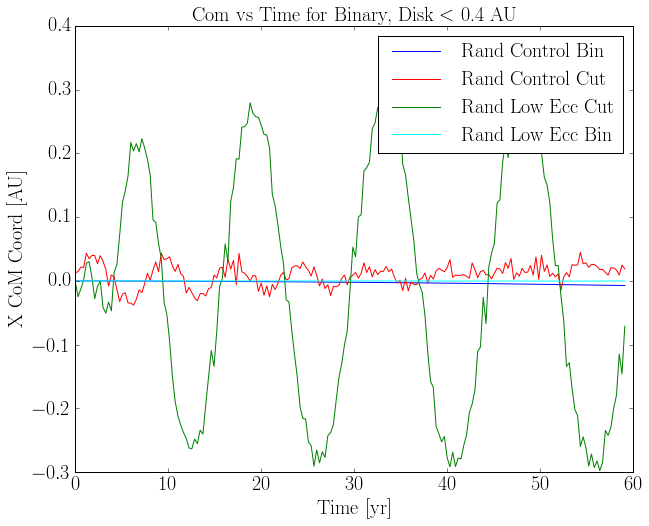

In [31]:
plt.plot(rand_control_time,rand_control_binComX,color='blue',label='Rand Control Bin')
plt.plot(rand_control_time,rand_control_cutComX,color='red',label='Rand Control Cut')
plt.plot(rand_lowEcc_time,rand_lowEcc_cutComX,color='green',label="Rand Low Ecc Cut")
plt.plot(rand_lowEcc_time,rand_lowEcc_comBinX,color='cyan',label="Rand Low Ecc Bin")

plt.xlabel("Time [yr]")
plt.ylabel('X CoM Coord [AU]')
plt.title("Com vs Time for Binary, Disk $<$ 0.4 AU")

plt.legend()

#Plot Binary/Disk Com_Vel vs Time

In [27]:
rand_control_binCovX = [  0.00000000e+00,  -3.44662402e-05,   9.62451372e-05,
        -3.28464153e-04,  -4.22094359e-05,  -4.17188714e-04,
        -6.52983336e-06,  -1.79466472e-04,  -3.77314907e-05,
        -2.99536526e-04,  -3.90795441e-04,  -1.53960036e-04,
        -3.21438271e-04,  -1.58502712e-04,  -1.94784447e-04,
        -2.78720065e-04,  -2.28592435e-04,  -3.15323640e-04,
        -2.02802314e-04,  -2.29128233e-04,  -1.13886484e-04,
        -2.82607277e-04,  -1.73471611e-04,  -1.66716076e-04,
        -1.28195373e-04,  -1.47432076e-04,  -2.26849478e-04,
        -4.17389083e-04,  -2.62595904e-04,  -2.25504587e-04,
        -4.00786287e-04,  -2.07281221e-04,  -1.53609445e-04,
        -2.63811313e-04,  -4.44865691e-04,  -2.18885682e-04,
        -4.00285705e-04,  -4.33725963e-04,  -5.14746143e-04,
        -3.06481377e-04,  -4.58974657e-04,  -3.10828441e-04,
        -2.75997333e-04,  -1.56269349e-04,  -4.32358362e-04,
        -3.15219187e-04,  -1.21592209e-04,  -1.81693810e-04,
        -1.62168491e-04,  -4.47769528e-04,  -4.27725770e-04,
        -6.68672660e-04,  -4.12547316e-04,  -4.17320575e-04,
        -4.66299054e-04,  -1.91393244e-04,  -4.00489851e-04,
        -1.03247520e-04,  -4.18886652e-04,  -1.43612609e-04,
        -3.39741623e-04,  -3.62532846e-04,  -3.08889767e-04,
        -4.80395795e-04,  -6.30588792e-04,  -4.77250509e-04,
        -3.81408460e-04,  -3.16079428e-04,  -4.47066096e-04,
        -4.37863786e-04,  -1.51369801e-04,  -1.71204397e-04,
        -4.57338304e-04,  -5.25120182e-04,  -6.38940853e-04,
        -5.29688402e-04,  -6.21151984e-04,  -4.90045861e-04,
        -5.97953464e-04,  -4.87569919e-04,  -5.50071897e-04,
        -5.30566974e-04,  -5.22419946e-04,  -3.61157104e-04,
        -2.55787415e-04,  -6.29863855e-04,  -3.57885728e-04,
        -6.01459484e-04,  -5.99429394e-04,  -7.15520870e-04,
        -5.85473850e-04,  -5.92080541e-04,  -3.74821905e-04,
        -4.42205570e-04,  -7.32058574e-04,  -3.40683794e-04,
        -6.47670766e-04,  -4.44862766e-04,  -6.34564751e-04,
        -4.85399051e-04,  -5.85694286e-04,  -6.31848685e-04,
        -6.16787738e-04,  -6.06439447e-04,  -4.39734666e-04,
        -4.21976472e-04,  -5.40737620e-04,  -4.33965710e-04,
        -5.35742668e-04,  -8.02311201e-04,  -6.69250247e-04,
        -7.87643694e-04,  -4.57832655e-04,  -7.13341480e-04,
        -8.30013625e-04,  -6.29386922e-04,  -6.01492262e-04,
        -6.30137601e-04,  -7.80078675e-04,  -5.59472444e-04,
        -6.68915139e-04,  -7.75253413e-04,  -6.06720205e-04,
        -7.50897059e-04,  -7.14232858e-04,  -5.47650980e-04,
        -6.08088666e-04,  -7.35417010e-04,  -5.55997162e-04,
        -4.37248063e-04,  -6.60402456e-04,  -6.29737009e-04,
        -8.30550036e-04,  -5.52749848e-04,  -7.94475992e-04,
        -7.43908631e-04,  -7.83224535e-04,  -7.50797550e-04,
        -9.04603160e-04,  -6.58669032e-04,  -6.28677160e-04,
        -7.50495048e-04,  -7.42391085e-04,  -7.20668771e-04,
        -7.69928708e-04,  -9.80033718e-04,  -8.83869723e-04,
        -1.06560634e-03,  -7.26117295e-04,  -9.33770570e-04,
        -8.22338263e-04,  -1.03034535e-03,  -8.92872781e-04,
        -9.75383671e-04,  -1.01175232e-03,  -8.31019185e-04,
        -1.02909221e-03,  -8.25796833e-04,  -8.95911417e-04,
        -8.10088028e-04,  -1.07192909e-03,  -9.65172948e-04,
        -7.70186948e-04,  -8.90334169e-04,  -1.00821826e-03,
        -1.21856367e-03,  -9.55259956e-04,  -1.13969987e-03,
        -1.00642399e-03,  -1.16703625e-03,  -6.80474601e-04,
        -8.52028107e-04,  -8.35833602e-04,  -8.75756101e-04,
        -9.08255546e-04,  -1.04250094e-03,  -1.23218590e-03,
        -9.52903615e-04,  -9.95592453e-04,  -1.03330763e-03,
        -8.53529805e-04,  -1.03239264e-03,  -9.87604431e-04,
        -1.03540333e-03,  -1.04147877e-03,  -1.05735375e-03,
        -8.41672875e-04,  -1.13662531e-03,  -1.15873405e-03,
        -1.32901828e-03,  -1.21372499e-03,  -1.06624813e-03,
        -9.22574163e-04,  -9.88983445e-04,  -9.95102577e-04,
        -8.40144110e-04,  -1.13075077e-03,  -1.07112433e-03,
        -1.07322480e-03]

rand_control_diskCovX = [ -1.5126256 ,  -1.65167331,  -4.00779158,  -5.04496851,
        -8.0354289 ,  -7.25484052,  -9.79234056,  -8.32228316,
       -10.29962872, -11.28193999,  -8.74678263,  -9.43325965,
        -6.82331308,  -7.90247617,  -5.69244233,  -3.18337335,
        -2.8900313 ,  -2.44443717,  -0.49515905,   1.74531975,
         1.03799587,   3.25726571,   1.56107433,   1.02126618,
         0.69393905,   0.86918266,  -1.93566243,  -1.39075816,
        -3.79511877,  -5.2513283 ,  -4.67550437,  -8.95841897,
        -7.84857164,  -9.06952394,  -8.97909541,  -9.29789789,
        -8.3497143 ,  -7.74469596,  -8.17316258,  -4.63791668,
        -4.75224184,  -3.10335463,  -2.6018622 ,   0.36220533,
        -0.53086794,  -0.30306845,   0.2209037 ,   0.80351038,
        -0.90484794,   0.37355293,  -2.32510622,  -2.30904879,
        -3.06573551,  -4.73845648,  -3.00088813,  -5.20346885,
        -4.86749413,  -7.33028667,  -4.52658142,  -9.64543304,
        -5.88985328,  -4.79459671,  -6.47577831,  -4.05308612,
        -5.44454985,  -4.47537662,  -1.69328104,  -3.43343426,
        -1.44316016,  -1.32784493,  -1.23193473,  -1.30243875,
        -0.38619502,  -0.29059253,  -2.19551559,  -2.34997492,
        -1.62956831,  -2.88566741,  -4.31676219,  -5.61977362,
        -6.67430956,  -6.7898244 ,  -8.08788717,  -6.50543483,
        -7.1735637 ,  -6.4562886 ,  -7.00111061,  -4.93631704,
        -3.92457256,  -4.02315485,  -2.37083858,  -1.60522769,
        -0.54306117,  -1.17757655,  -1.2918314 ,  -1.77202876,
        -1.03103411,  -3.07460906,  -1.10957091,  -2.97700063,
        -2.68480148,  -3.72043253,  -3.39556717,  -5.57421232,
        -5.24106186,  -5.73959351,  -4.60606218,  -5.33647792,
        -5.42667641,  -4.26795998,  -6.01263563,  -5.66170869,
        -7.2788476 ,  -5.9235328 ,  -6.15081406,  -5.52803381,
        -4.69335924,  -4.2670216 ,  -2.40604717,  -3.74200719,
        -2.1271753 ,  -2.17052372,  -2.35009723,  -2.10470604,
        -1.39241017,  -2.83219843,  -2.28429318,  -2.19918767,
        -1.51924294,  -3.11922652,  -3.44235654,  -5.32144922,
        -4.11181106,  -5.50103192,  -6.67581384,  -5.44160528,
        -3.21380046,  -4.38708606,  -4.66410755,  -4.98185644,
        -4.03089134,  -3.59967485,  -4.08866682,  -5.40969569,
        -4.78645659,  -3.56334996,  -4.39103124,  -3.89461665,
        -3.91874112,  -3.96974105,  -3.72064514,  -3.99302409,
        -4.16286445,  -4.42467072,  -4.69350698,  -6.29595816,
        -4.1547458 ,  -6.48633821,  -3.56127029,  -4.41146317,
        -4.39013052,  -4.68041565,  -4.86606127,  -5.44333464,
        -5.25268531,  -4.07465792,  -6.83275246,  -4.48811929,
        -8.10824661,  -3.62448687,  -6.49627804,  -3.33448353,
        -5.07028484,  -3.17845176,  -2.26118164,  -1.39727202,
        -1.80522507,  -3.57740069,  -3.16799806,  -4.76228035,
        -6.38844709,  -4.69763866,  -6.612915  ,  -4.71243205,
        -6.27378816,  -5.01240057,  -7.21131357,  -5.43375619,
        -6.09954938,  -5.4777062 ,  -4.69170273,  -4.01259332,
        -4.25706036,  -4.27559808,  -5.41513147,  -3.9322204 ,
        -4.03988551,  -5.5681088 ,  -4.15420189]

rand_lowEcc_diskCovX = [  0.77898797,   1.57833866,   2.38863217,   3.40701148,
         2.48352759,   4.36322833,   8.57983618,  11.11732867,
         8.13365034,   9.4756637 ,  18.38497572,  16.97897149,
        21.31103577,  21.22253813,  17.39017903,  14.0628516 ,
        10.12295822,   1.94075525,  -1.07775588,  -9.30955363,
       -17.23845933, -21.37340468, -21.71260131, -30.27500394,
       -35.50196759, -36.41238004, -37.62509692, -38.08500723,
       -35.88332165, -35.50672278, -33.33106392, -30.85999458,
       -22.66648974, -21.93878725, -12.91471643,  -7.05439705,
         2.31718962,   6.21311488,  10.73867876,  17.96918075,
        19.20569263,  28.30079839,  30.8831651 ,  33.5354604 ,
        38.03217296,  40.43434213,  41.64392787,  42.15158522,
        40.84057607,  39.05393268,  40.03316223,  36.24276594,
        29.59492791,  28.47291982,  22.9794586 ,  24.13108538,
        12.20828893,   7.45982279,   1.50355105,  -2.30613005,
       -12.20141423, -16.40766442, -21.22114568, -27.41957954,
       -28.84923137, -31.31003167, -37.40647979, -40.4959681 ,
       -41.95281726, -42.7981446 , -42.56091383, -41.46580417,
       -40.76993254, -38.38212678, -35.37956372, -32.20474293,
       -27.11290213, -26.24868669, -18.024329  , -14.62735563,
        -6.45090835,  -2.04945776,   4.18011961,   7.6196234 ,
        14.48677844,  18.08660124,  24.96174356,  30.31698632,
        35.55709176,  40.32201023,  39.15481735,  41.21744306,
        44.85353782,  42.04793646,  45.00366348,  42.51266827,
        41.72615711,  38.92801538,  37.44887222,  32.17050213,
        24.48484257,  25.02725828,  16.24246455,  16.18161924,
         6.33807262,   2.03869272,  -0.6570159 ,  -9.9160961 ,
       -12.57730826, -22.93593491, -25.21130883, -32.75696005,
       -31.92793658, -34.59386864, -40.30345398, -41.37916997,
       -41.81226885, -44.77427734, -42.45896069, -42.92549817,
       -40.05130083, -40.4003472 , -35.85871249, -32.82294389,
       -29.04893104, -27.22059023, -23.35880779, -14.90757144,
        -7.77531276,  -4.17832706,   3.47438538,   9.4963396 ,
        12.39946865,  14.73777289,  22.54199223,  27.66521168,
        32.8445241 ,  37.36743206,  37.3521086 ,  40.21008503,
        41.21920734,  43.46178485,  44.20773532,  43.65711613,
        44.79675309,  39.76273156,  39.65398226,  32.59524381,
        36.70642274,  29.10109591,  24.56519464,  22.88643289,
        14.26685193,  12.37901575,   1.96513927,  -1.67945581,
        -3.36070802, -16.19644279, -16.51751263, -23.20482377,
       -25.02884003, -32.55437688, -35.21901456, -38.74079143,
       -40.88142771, -42.01386169, -44.42113075, -46.00458279,
       -45.15618165, -44.6585503 , -43.02429994, -42.08290425,
       -38.6199642 , -33.19797918, -31.7537908 , -27.49925803,
       -23.66452656, -13.6948019 , -12.91483604,  -5.76925396,
        -1.31826054,   3.01890583,  11.37350305,  12.18349423,
        19.71945794,  23.66122164,  28.29464667,  33.96283017,
        36.32521476,  38.23232969,  40.43232437,  42.60912096,
        43.59694651,  46.66450731,  45.3996852 ,  44.14779248,
        40.45245177,  43.60926838,  38.7946921 ]

rand_lowEcc_binCovX = [  0.00000000e+00,  -5.34923846e-05,  -6.64845564e-05,
        -4.33460968e-04,  -1.64193255e-04,  -1.81730410e-04,
        -3.40928004e-04,  -6.85394607e-04,   1.44548929e-05,
         4.14449499e-04,  -1.16253574e-04,   4.79198193e-04,
         2.23820787e-05,   7.00056332e-05,   8.05942242e-05,
         1.78516008e-04,  -2.08011302e-04,  -2.83853794e-04,
        -3.99268355e-04,  -2.16383050e-04,  -1.72754962e-04,
        -2.59498691e-04,  -5.54155249e-04,  -3.93072504e-05,
        -1.41112006e-04,  -3.80210846e-04,  -2.81833325e-04,
         2.58091168e-05,  -7.23899905e-05,  -4.36764387e-04,
        -2.03032592e-04,  -1.76150724e-04,  -5.82563660e-05,
        -2.54213860e-04,  -4.78098107e-05,   5.83330344e-05,
        -2.36500599e-04,  -2.29224066e-04,   2.48177156e-05,
         1.02031632e-04,   2.28121231e-04,   1.64083560e-04,
         7.76420378e-05,   2.14331702e-04,   2.82511085e-04,
         1.32028557e-04,   2.90219932e-04,   9.29529157e-05,
         1.22581252e-04,   1.21643193e-04,   7.23196512e-05,
        -2.25215148e-05,   1.71447477e-04,   1.99716983e-06,
         8.19852519e-05,  -1.90109171e-04,  -1.38166388e-04,
         1.30522240e-04,  -2.07466670e-04,  -4.17296034e-04,
        -8.03657045e-05,  -1.57644711e-04,  -2.37040743e-04,
        -2.26641592e-04,  -4.45961754e-04,  -4.66227968e-04,
        -1.08581367e-04,  -5.32177154e-05,  -2.13471462e-04,
        -5.03141438e-04,   6.12146284e-05,   2.16641039e-04,
        -1.67410213e-04,  -5.18369480e-04,  -2.97862035e-04,
        -8.68209078e-05,  -4.18619727e-04,  -1.43059752e-04,
        -2.33447354e-05,   9.34982318e-05,   8.52592361e-05,
        -4.41609127e-05,   2.31979955e-04,   3.50471814e-04,
         3.04385046e-04,   3.92463428e-04,  -2.55918791e-06,
         7.95096228e-05,   1.91780255e-04,   2.68430146e-04,
         4.45320904e-04,   2.91298357e-04,   3.23627602e-04,
         1.99272218e-04,  -9.21845279e-05,   2.04818759e-04,
         4.14741846e-04,   1.50873389e-04,  -1.49996197e-04,
         2.77680254e-04,   2.06220986e-04,  -1.35716403e-04,
         7.95365340e-06,  -1.88426744e-04,   6.09211568e-05,
        -1.40779439e-04,  -1.56321143e-04,  -1.37570125e-04,
         1.31841951e-05,   3.31192472e-06,  -1.32128460e-04,
        -1.06097909e-04,  -2.80318816e-04,  -2.04469168e-04,
        -1.26462231e-04,  -2.66803263e-04,  -4.87774613e-04,
        -4.47451020e-04,  -2.20706347e-04,  -2.28705598e-04,
        -2.45148325e-04,  -8.47289713e-05,  -2.83985861e-04,
        -2.76947406e-04,  -1.25098372e-04,   2.22215515e-05,
         6.07563916e-05,   6.72276302e-05,  -2.00065376e-04,
        -7.49768806e-06,  -1.64401893e-04,  -3.28377541e-04,
         2.15527702e-05,   4.37081623e-04,   1.08117116e-04,
         1.42211143e-04,  -1.27683226e-04,   1.70996029e-04,
         3.66508096e-04,   1.08112373e-04,   2.36921908e-04,
         2.37938241e-04,   1.01392835e-04,   2.75508171e-04,
         3.48262575e-04,   3.66599510e-04,   1.57544550e-04,
         1.68373451e-04,  -4.12027831e-05,  -1.78907481e-05,
         6.92867023e-05,  -1.55375413e-05,  -4.71555830e-05,
         1.05083519e-05,   8.29191882e-06,   8.89450308e-05,
        -1.90216896e-04,   3.66172911e-06,  -8.21931479e-05,
        -1.31558945e-04,  -2.77210844e-04,   3.04982678e-05,
         3.59246883e-05,   2.94710484e-04,   3.83594289e-05,
        -3.12614463e-04,  -2.39987400e-04,   2.93023612e-05,
        -7.60489508e-05,  -9.60984229e-05,  -2.44843211e-04,
        -2.53002020e-04,  -1.50779900e-04,  -8.53930636e-05,
         9.07427402e-05,   3.90741689e-05,  -1.96535202e-04,
        -3.17662118e-04,  -1.01405697e-04,  -1.80767578e-04,
        -8.25531212e-05,   2.10176574e-04,   2.26438321e-04,
         2.75334263e-04,   7.06060122e-05,  -6.04716733e-05,
        -8.56491616e-06,  -1.23788719e-04,   3.05034811e-04,
         6.58372649e-04,   5.63655885e-04,   1.23729296e-04,
         3.11940568e-04,   2.92992329e-04,   1.27585189e-04,
         9.40623415e-05,   4.36472518e-05,  -1.17963437e-04,
         1.90672601e-04]

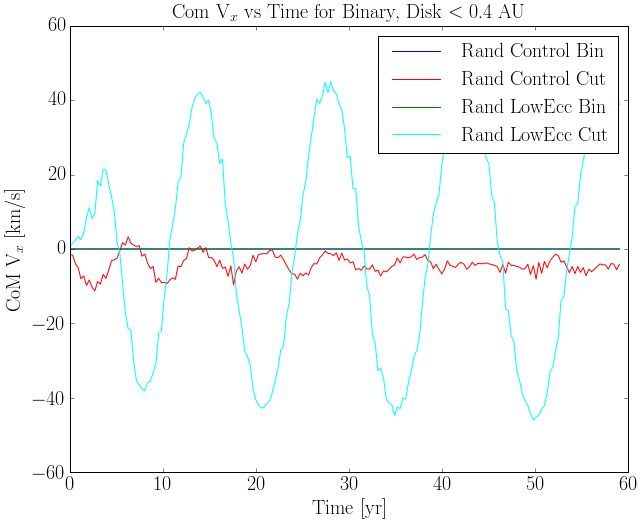

In [30]:
plt.plot(rand_control_time,rand_control_binCovX,color='blue',label='Rand Control Bin')
plt.plot(rand_control_time,rand_control_diskCovX,color='red',label='Rand Control Cut')
plt.plot(rand_lowEcc_time,rand_lowEcc_binCovX,color='green',label='Rand LowEcc Bin')
plt.plot(rand_lowEcc_time,rand_lowEcc_diskCovX,color='cyan',label='Rand LowEcc Cut')

plt.xlabel("Time [yr]")
plt.ylabel('CoM V$_{x}$ [km/s]')
plt.title("Com V$_{x}$ vs Time for Binary, Disk $<$ 0.4 AU")
plt.legend()

#Plot disk averaged eccentricity vs Time

In [15]:
rand_control_EccAvg = [ 0.00487201,  0.04180032,  0.03851285,  0.03752069,  0.03780721,
        0.03956908,  0.04223939,  0.04201101,  0.04269907,  0.04346587,
        0.04481644,  0.04536227,  0.04443861,  0.04353817,  0.04369682,
        0.04470908,  0.04355081,  0.04240949,  0.04107202,  0.03974267,
        0.04012787,  0.03843651,  0.03686991,  0.03591092,  0.035957  ,
        0.03666101,  0.03643748,  0.03553824,  0.03578638,  0.03814097,
        0.03921233,  0.03988067,  0.04049772,  0.04217771,  0.04429624,
        0.04397485,  0.04379825,  0.0436872 ,  0.04504912,  0.0448944 ,
        0.04399126,  0.04317838,  0.04337346,  0.04307827,  0.04198505,
        0.04039283,  0.03891559,  0.0390871 ,  0.03950234,  0.03857206,
        0.03791866,  0.03760023,  0.03928343,  0.03972615,  0.03885249,
        0.03866659,  0.04026426,  0.04168991,  0.04205447,  0.04153104,
        0.04233504,  0.04278785,  0.04320669,  0.04258799,  0.04191725,
        0.04249705,  0.04270488,  0.04226141,  0.04136872,  0.04051884,
        0.04081458,  0.04074077,  0.03915969,  0.03825639,  0.03825456,
        0.03950996,  0.0393274 ,  0.03878758,  0.0390752 ,  0.04096421,
        0.04170068,  0.04114054,  0.04150873,  0.04246561,  0.04343714,
        0.04306775,  0.0424147 ,  0.04285842,  0.0431017 ,  0.04279854,
        0.0417474 ,  0.04069654,  0.04075689,  0.04120416,  0.04000833,
        0.03931684,  0.0391979 ,  0.03983416,  0.03950426,  0.03916882,
        0.03849648,  0.03971262,  0.04009718,  0.03963512,  0.03908021,
        0.04000813,  0.04112507,  0.04093958,  0.04035521,  0.04081016,
        0.04158027,  0.04256347,  0.04179268,  0.04185037,  0.04328444,
        0.04332157,  0.04305916,  0.04194896,  0.04263865,  0.04244831,
        0.04204137,  0.04059532,  0.0400513 ,  0.04045862,  0.040432  ,
        0.0393538 ,  0.03855592,  0.03933001,  0.04002192,  0.0391092 ,
        0.03849106,  0.03957885,  0.04029119,  0.04021804,  0.03972438,
        0.04020537,  0.04107444,  0.04121746,  0.04007836,  0.03983128,
        0.04049721,  0.04037862,  0.03981167,  0.03915504,  0.04001195,
        0.04090319,  0.04007406,  0.03927385,  0.03948236,  0.04038467,
        0.03961908,  0.03895531,  0.03910493,  0.04029266,  0.04039683,
        0.03956583,  0.03900967,  0.0402679 ,  0.04033355,  0.03977701,
        0.03936939,  0.04004704,  0.04111372,  0.04020798,  0.03980901,
        0.0403087 ,  0.04134421,  0.04076755,  0.04022486,  0.04014529,
        0.04147857,  0.04126809,  0.04042575,  0.03972712,  0.04066002,
        0.04039926,  0.03906719,  0.0381269 ,  0.03894483,  0.03913009,
        0.03905672,  0.03823394,  0.03939917,  0.0401762 ,  0.04006709,
        0.03936568,  0.04030915,  0.04070843,  0.0406252 ,  0.03996044,
        0.03995623,  0.04067097,  0.04043389,  0.03957182,  0.03945732,
        0.04007075,  0.04014291,  0.03936366,  0.03870979]

rand_lowEcc_EccAvg = [ 0.00500734,  0.03249216,  0.0324958 ,  0.03347418,  0.03397438,
        0.03602948,  0.04041205,  0.04513343,  0.04971377,  0.05294594,
        0.05750857,  0.06076513,  0.06514267,  0.06813331,  0.07115473,
        0.074007  ,  0.07756696,  0.07947312,  0.08246412,  0.0840094 ,
        0.08677427,  0.08773907,  0.08886279,  0.09025826,  0.09189344,
        0.09272375,  0.09395771,  0.09460556,  0.09510229,  0.09579088,
        0.09626372,  0.09723888,  0.09799683,  0.09855137,  0.09846784,
        0.09910923,  0.09957972,  0.09950406,  0.09957766,  0.10077185,
        0.10130065,  0.10128989,  0.10087359,  0.10056851,  0.10161155,
        0.10215376,  0.10182201,  0.10162289,  0.10236954,  0.10232074,
        0.10284893,  0.10331323,  0.10463164,  0.10431289,  0.10469804,
        0.10512315,  0.10526233,  0.10565402,  0.10582524,  0.10628243,
        0.10644306,  0.10668714,  0.10720244,  0.10756658,  0.1078622 ,
        0.10787792,  0.10861674,  0.10898486,  0.10862385,  0.10911845,
        0.10960801,  0.11033102,  0.11009527,  0.11007839,  0.11100564,
        0.11130082,  0.11176758,  0.11247991,  0.11222803,  0.11255093,
        0.11338593,  0.11335151,  0.113533  ,  0.11372692,  0.11412401,
        0.1147058 ,  0.11475829,  0.11485172,  0.11571516,  0.11589287,
        0.1155855 ,  0.1161617 ,  0.11603841,  0.11615223,  0.11694014,
        0.11663835,  0.11579418,  0.11593714,  0.11665504,  0.11621879,
        0.11593484,  0.11648813,  0.11628673,  0.11653722,  0.11638078,
        0.11595897,  0.11636726,  0.11625445,  0.11624765,  0.11619117,
        0.11616727,  0.11645269,  0.11593247,  0.11580054,  0.11636329,
        0.11697719,  0.11659711,  0.11636697,  0.11714402,  0.11707672,
        0.11735839,  0.11759648,  0.11755906,  0.11776528,  0.11780128,
        0.11795161,  0.11834771,  0.11886222,  0.11893544,  0.11882141,
        0.11987957,  0.1197417 ,  0.11962029,  0.12000008,  0.11982921,
        0.12008821,  0.1201905 ,  0.12042185,  0.12043252,  0.12031116,
        0.11999559,  0.1203899 ,  0.12105716,  0.12093766,  0.12096428,
        0.12119392,  0.12136223,  0.12179417,  0.12183363,  0.12219711,
        0.12201712,  0.12286412,  0.12285458,  0.12352229,  0.12261333,
        0.12247145,  0.12251773,  0.12317143,  0.12336107,  0.12293545,
        0.12290551,  0.12442698,  0.12439054,  0.12401112,  0.12424855,
        0.12497671,  0.12544967,  0.12587754,  0.12542407,  0.12571893,
        0.12539773,  0.12504962,  0.1253236 ,  0.12544627,  0.12547084,
        0.12618286,  0.12595276,  0.12581871,  0.126423  ,  0.1266554 ,
        0.12674926,  0.12723005,  0.12719745,  0.12742923,  0.12821989,
        0.12743035,  0.12799925,  0.12841639,  0.12810177,  0.12837832,
        0.12859332,  0.12874983,  0.12839356,  0.12837171,  0.1285162 ,
        0.1279544 ,  0.12914065,  0.1288253 ,  0.12925462]

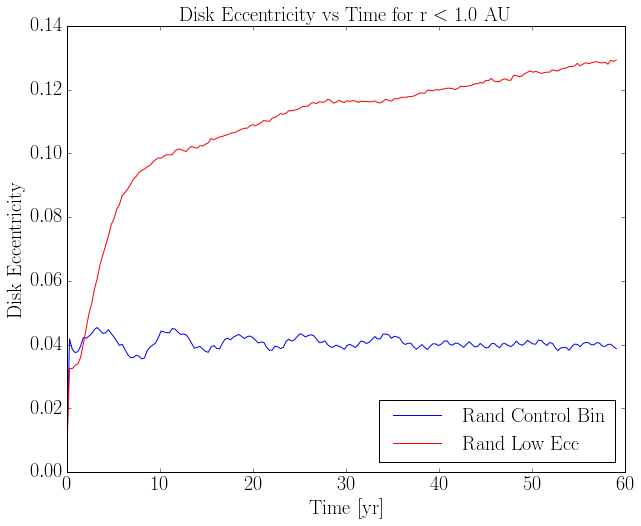

In [32]:
plt.plot(rand_control_time,rand_control_EccAvg,color='blue',label='Rand Control Bin')
plt.plot(rand_lowEcc_time,rand_lowEcc_EccAvg,color='red',label="Rand Low Ecc")

plt.xlabel("Time [yr]")
plt.ylabel('Disk Eccentricity')
plt.title("Disk Eccentricity vs Time for r $<$ 1.0 AU")
plt.legend(loc='lower right')